In [1]:
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math
import time
from scipy import fft
from scipy import signal

In [2]:
path = r"D:\study\moed2\7lab\model.jpg"

img = cv.imread(path)
print(img.shape)
img = img[:,:,2]
print(img.shape)

(300, 400, 3)
(300, 400)


In [3]:
def show_picture_plot(image, title: str='window_name'):
    try:
        plt.figure(figsize=(10,10))
        plt.title(title)
        plt.imshow(image, cmap='gray')
    except Exception :
        # cv.destroyAllWindows()
        print('error')

In [4]:
def show_picture(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def show_picture_not_close(image, title: str='window_name'):
    try:
        cv.imshow(title, image)
        # cv.waitKey(0)
        # cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

def inverse_image(image):
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        vmax = np.max(image)

        new_image = vmax - (1) - image

        result = np.array(new_image)
        return result

In [5]:
def gray_image(image):
    mx = np.max(image)
    mn = np.min(image)
    amp = mx-mn
    img_restore_shift = (((image-mn)/amp)*255).astype('int')
    return img_restore_shift

In [6]:
def build_histogram(image):
    x_len, y_len = image.shape[0], image.shape[1]


    histogram = np.zeros(256)
    print(histogram.shape)
    for i in range(x_len):
        for e in range(y_len):
            histogram[image[i,e]]+=1
    mx = np.max(histogram)
    histogram = (histogram/mx)*255
    return histogram

def build_cdf(histogram):
    cdf = np.zeros(256)
    cdf[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cdf[i]+=cdf[i-1]+histogram[i]
    mx = np.max(cdf)
    cdf = (cdf/mx)*255
    return cdf

In [7]:
from numpy import ndarray
from typing import Union
from random import randint


def fourier_transform_1d(image_vector, dt=None):
    # start_time = time.time()
    N = len(image_vector)
    if dt:
        # dt = 1
        fgr = 1. / (dt * 2)
        print(fgr)
        df = (2. * fgr) / N
        print(df)
        data_new = image_vector.copy()[:int(fgr / df)]
        data_x_new = df * np.array(range(int(fgr / df)))
        gr = int(fgr / df)

        data_np = np.array(image_vector)
    else:
        data_new = np.zeros(N//2)
        data_x_new = np.array(range(N // 2))
        gr = N//2
        data_np = np.array(image_vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        re /= N
        im /= N
        data_new[n] = math.sqrt(re ** 2 + im ** 2)
    # print('elapsed', time.time() - start_time)
    return data_new

def fourier_transform_1d_back(vector, dt=None):
    N = len(vector)
    if dt:
        # dt = 1
        fgr = int(1 / (dt * 2))
        print(fgr)
        df = (2 * fgr) / N
        print(df)
        data_new = vector.copy()[:int(fgr / df)]
        data_x_new = df * np.array(range(int(fgr / df)))
        gr = int(fgr / df)

        data_np = np.array(vector)
    else:
        data_new = np.zeros(N//2)
        data_x_new = np.array(range(N // 2))
        gr = N//2
        data_np = np.array(vector)

    '''Спектр высчитывается вручную'''
    for n in range(gr):
        # re = 0
        # im = 0
        # for k in range(N):
        #     re += image_vector[k] * math.cos((2 * math.pi * n * k) / N)
        #     im += image_vector[k] * math.sin((2 * math.pi * n * k) / N)
        '''Оптимизированный способ'''
        re = np.sum(data_np * np.cos((2 * math.pi * n * np.arange(N)) / N))
        im = np.sum(data_np * np.sin((2 * math.pi * n * np.arange(N)) / N))
        re /= N
        im /= N
        data_new[n] = re + im
    # print('elapsed', time.time() - start_time)
    return data_new

def diff_func(vector, dt=None):
    N = len(vector)
    diff = np.zeros(N)

    for i in range(N-1):
        if vector[i]==0:
            diff[i]=0
            continue
        if dt:
            diff[i] = (vector[i+1]-vector[i])/dt
        else:
            diff[i] = (vector[i+1]-vector[i])
    return diff

def show_plot(func, x=None,  title = 'title'):
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.grid()
    if x is not None:
        plt.plot(x, func)
    else:
        plt.plot(func)

def show_plots(funcs, x=None,  title = 'title'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)
    plt.title(title)
    plt.grid()
    for i in range(len(funcs)):
        if x is not None:
            ax.plot(x, funcs[i])
        else:
            ax.plot(funcs[i])

def gamma_transform_image(image, C: float, gamma: float):
    # try:
    # print('here')
    new_image = []
    if len(image.shape)==2:
        # start_time = time.time()
        image=np.array(image)
        x_len, y_len = image.shape[0], image.shape[1]
        # print(image[:10])
        new_image = C * (image ** gamma)
        # print(new_image[:10])

        result = np.array(new_image)
        # result = np.array(new_image)
        # print('time', time.time()-start_time)
        # print('orig shape', result.shape)
        return result

    # except Exception:
    #     cv.destroyAllWindows()
    #     print('error')

def autocorrelation_vector(vector):
    n = vector.shape[0]
    av = np.average(vector)
    vector_av = vector-av
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def correlation_vector(vector, vector2):
    n = vector.shape[0]
    av = np.average(vector)
    av2 = np.average(vector2)
    vector_av = vector-av
    vector2_av = vector2-av2
    new_vector = []
    for lp in range(n):
        sm = 0
        for i in range(n-lp-1):
            sm+=vector_av[i]*vector2_av[i+lp]
        new_vector.append(sm/n)
    return np.array(new_vector)

def convolution(vector1, vector2):
    """
    Функция свёртки

    :param
    :return:
    """
    M = len(vector1)
    N = len(vector2)

    # data_new = np.zeros(N+M)
    #
    # for k in range(N+M):
    #     sm = 0
    #     for j in range(M):
    #         if k-j < 0:
    #             sm += func.data[k - j] * self.data[j]
    #             continue
    #         if k-j>=N:
    #             sm += func.data[(k - j)%N] * self.data[j]
    #             continue
    #         sm += func.data[(k - j) % N] * self.data[j]
    #     data_new[k] = sm
    #
    # data_new = data_new[M//2:-M//2]
    # data_x_new = np.array(range(N))

    '''с помощью библиотеки'''
    data_new = signal.convolve(vector1, vector2, mode='same')
    # data_new = np.convolve(self.data, func.data, mode='full')
    # data_x_new = np.arange(len(data_new))

    return data_new

def normilize(vector, vl=None):
    mx = vl
    if vl is None:
        mx = np.max(vector)
    vector/=mx
    return vector

class Filter:
    """Цифровые фильтры частот"""

    @staticmethod
    def lpf(fc, dt, m) -> list:
        data = []
        m: int = m
        fc: float = fc
        dt: float = dt

        d = [0.35577019, 0.2436983, 0.07211497, 0.00630165]
        # rectangular part weights
        fact = 2 * fc * dt
        arg = fact * np.pi
        data = np.sin(arg * np.array(range(1, m + 1))) / np.array(np.array(range(1, m + 1)) * np.pi)
        data = list(data)
        data.insert(0, fact)

        # trapezoid smoothing in the end
        data[m] /= 2.
        #
        # # P310 smoothing window
        sumg = data[0]
        for i in range(1, m + 1):
            sum = d[0]
            arg = np.pi * i / m
            for k in range(1, 4):
                sum += 2. * d[k] * np.cos(arg * k)
            data[i] *= sum
            sumg += 2 * data[i]

        for i in range(m + 1):
            data[i] /= sumg

        sym_data = data[:0:-1]
        data = sym_data + data

        return data

    @staticmethod
    def hpf(fc, dt, m) -> list:
        data = []
        lpw = Filter.lpf(fc, dt, m)
        mmax = max(lpw)
        for i in range(2*m+1):
            val = 1.-lpw[i] if i == m else -lpw[i]
            data.append(val)

        return data

    @staticmethod
    def bpf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            data.append(lpw2[i]-lpw1[i])

        return data

    @staticmethod
    def bsf(fc1, fc2, dt, m) -> list:
        data = []
        lpw1 = Filter.lpf(fc1, dt, m)
        lpw2 = Filter.lpf(fc2, dt, m)
        if fc1 >= fc2:
            raise Exception('fc1 must be less then fc2')
        for i in range(2 * m + 1):
            val = 1. + lpw1[i] - lpw2[i] if i == m else lpw1[i] - lpw2[i]
            data.append(val)

        return data

def generate_salt_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    return image.astype('int')

def generate_salt_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] += randint(val-d, val+d)
    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] += randint(val-d, val+d)
    return image.astype('int')

def generate_pepper_noise(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
    rng = np.arange(x)
    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)
        image[image<0] = 0
    return image.astype('int')

def generate_pepper_noise2(form:Union[tuple, ndarray], n, val, d=10):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.zeros((x,y))
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'float')
    rng = np.arange(x)

    for i in range(x):
        nn = randint(0,n)
        pos = random.sample(range(y), int(nn))
        image[i, pos] -= randint(val-d, val+d)

    for i in range(y):
        nn = randint(0,n)
        pos = random.sample(range(x), int(nn))
        image[pos, i] -= randint(val-d, val+d)

    # image[image<0] = 0
    return image.astype('int')

def generate_random_noise2(form:Union[tuple, ndarray], mn=0, mx=0):
    if isinstance(form, tuple):
        x, y = form[0], form[1]
        image = np.random.random(size=(x,y)) * (mx - mn) + mn
    else:
        x, y = form.shape[0], form.shape[1]
        image = np.array(form, 'int')
        image+=np.array(np.random.random(size=(x,y)) * (mx - mn) + mn, 'int')

    return np.array(image, 'int')

def avg_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.average(image_c[le:lr,re:rr])
    return image_c2

def mean_filter_clear(image, shape):
    image_c = np.array(image)
    image_c2 = np.array(image)

    dx = 0
    dy = 0

    lx,ly = image.shape

    mx, my = shape[0]//2, shape[1]//2

    for i in range(lx):
        for e in range(ly):
            le = i-mx if i-mx >= 0 else 0
            lr = i+mx if i+mx < lx else lx
            re = e-my if e-my >= 0 else 0
            rr = e+my if e+my < ly else ly
            image_c2[i, e] = np.median(image_c[le:lr,re:rr])
    return image_c2

61
70.0
229
(300, 400)


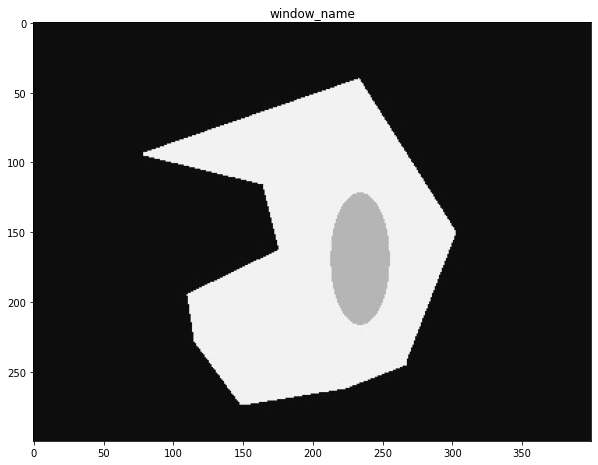

In [8]:
print(np.min(img))
print(np.median(img))
print(np.max(img))
show_picture_plot(img)
print(img.shape)


61
61
70.0
418
255


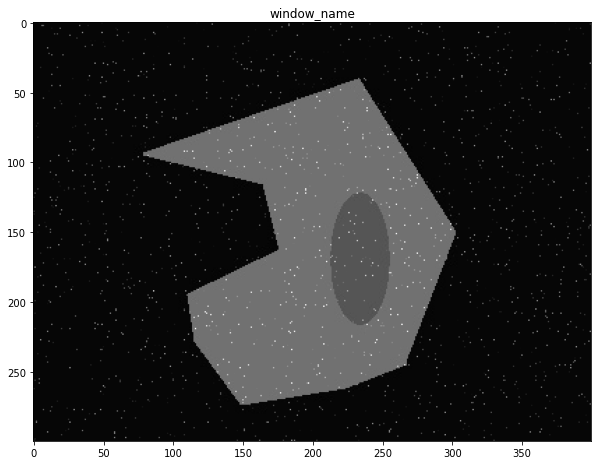

In [11]:
# salt_n = generate_salt_noise((300, 400), 50, 100, 100)
print(np.min(img))
salt_n = generate_salt_noise2(img, 5, 100, 100)
print(np.min(salt_n))
print(np.median(salt_n))
print(np.max(salt_n))
salt_n = gray_image(salt_n)
print(np.max(salt_n))
show_picture_plot(salt_n)

61
70.0
229
-2
70.0
229
255


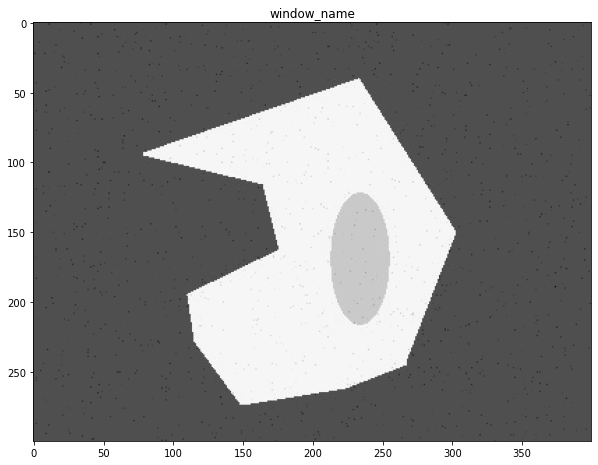

In [15]:
# salt_n = generate_salt_noise((300, 400), 50, 100, 100)
print(np.min(img))
print(np.median(img))
print(np.max(img))
pepper_n = generate_pepper_noise2(img, 5, 20, 20)
print(np.min(pepper_n))
print(np.median(pepper_n))
print(np.max(pepper_n))
pepper_n_n = gray_image(pepper_n)
print(np.max(pepper_n_n))
show_picture_plot(pepper_n)

61
70.0
229
43
76.0
244
255


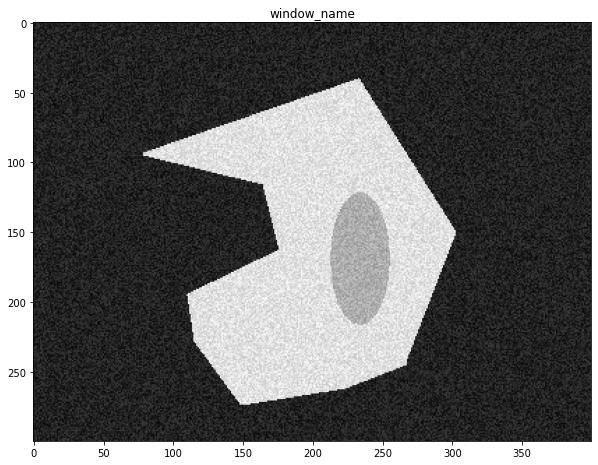

In [16]:
# salt_n = generate_salt_noise((300, 400), 50, 100, 100)
print(np.min(img))
print(np.median(img))
print(np.max(img))
random_n = generate_random_noise2(img, -20, 20)
print(np.min(random_n))
print(np.median(random_n))
print(np.max(random_n))
random_n_n = gray_image(random_n)
print(np.max(random_n_n))
show_picture_plot(random_n)

-200.0
0
0.0
255
255


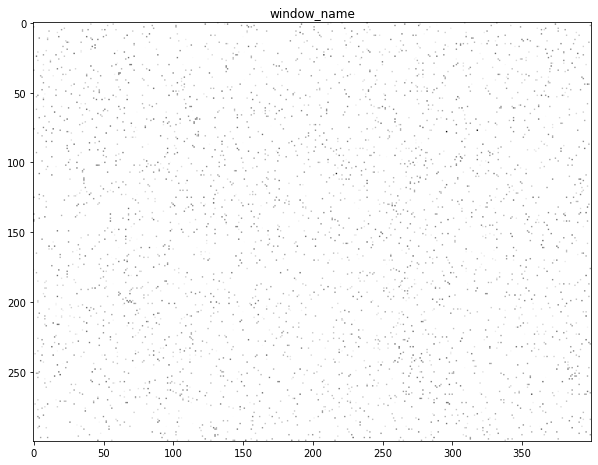

In [94]:
print(np.min(pepper_n))
print(np.min(salt_n))
print(np.max(pepper_n))
print(np.max(salt_n))
salt_pepper_n = salt_n+pepper_n
salt_pepper_n = gray_image(salt_pepper_n)
print(np.max(salt_pepper_n))
show_picture_plot(salt_pepper_n)

In [153]:
# path_save = r"D:\study\moed2\3lab\p1.jpg"
# path_save = r"D:\study\moed2\3lab\p2.jpg"
# path_save = r"D:\study\moed2\3lab\p3.jpg"
# path_save = r"D:\study\moed2\3lab\p4.jpg"
# path_save = r"D:\study\moed2\3lab\p5.jpg"
# path_save = r'D:\study\moed2\1lab\grace.jpg'
# path_save = r"D:\study\moed2\2lab\c12-85v.png"
# path_save = r"D:\study\moed2\7lab\model_1.jpg"
path_save = r"D:\study\moed2\7lab\model_3.jpg"
cv.imwrite(path_save, random_n)

True

True

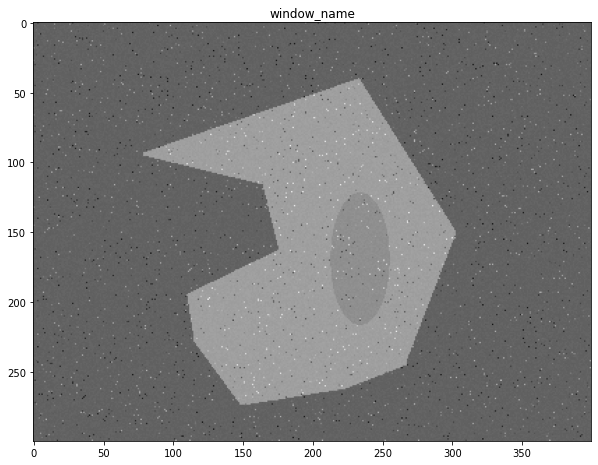

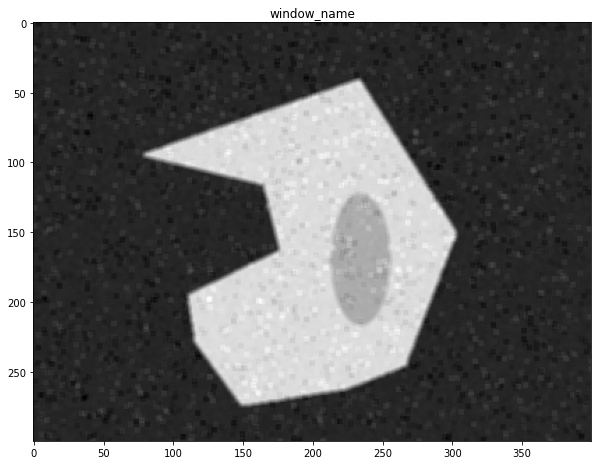

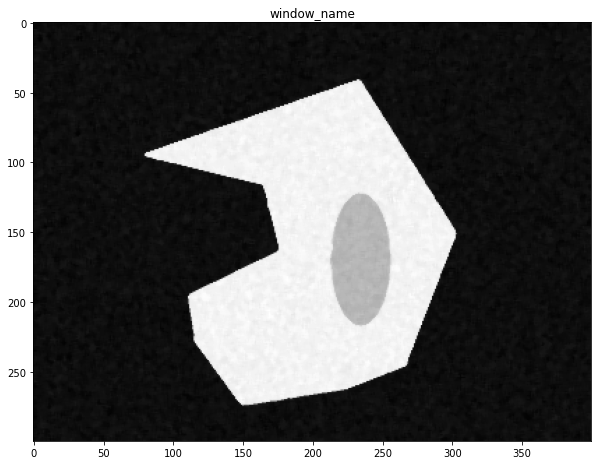

In [12]:
salt_n = generate_salt_noise2((300, 400), 5, 100, 100)
pepper_n = generate_pepper_noise2((300, 400), 5, 100, 100)
random_n = generate_random_noise2((300, 400), -20, 20)

# print(pepper_n)

# show_picture_plot(salt_n)
# show_picture_plot(pepper_n)
# show_picture_plot(random_n)

# img_s_n = img+salt_n
# img_p_n = img+pepper_n
# img_r_n = img+random_n
# img_sp_n = img+pepper_n+salt_n
img_spr_n = img+salt_n+pepper_n+random_n*0.5

# show_picture_plot(img_s_n)
# show_picture_plot(img_p_n)
# show_picture_plot(img_r_n)
# show_picture_plot(img_sp_n)
show_picture_plot(img_spr_n)
r = 5
img_cor = avg_filter_clear(img_spr_n, (r,r))
img_cor_m = mean_filter_clear(img_spr_n, (r,r))

show_picture_plot(img_cor)
show_picture_plot(img_cor_m)

path_save = r"D:\study\moed2\7lab\model_5n.jpg"
path_save2 = r"D:\study\moed2\7lab\model_5v.jpg"
cv.imwrite(path_save, img_spr_n)
cv.imwrite(path_save2, img_cor_m)

(256,)
(256,)
(256,)
(256,)


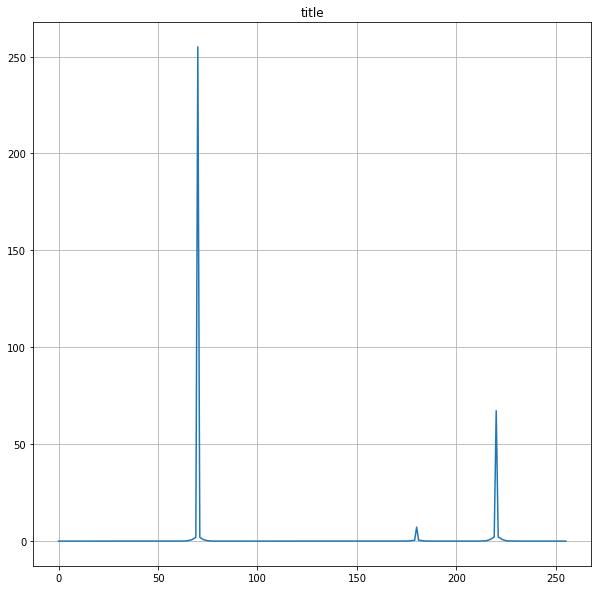

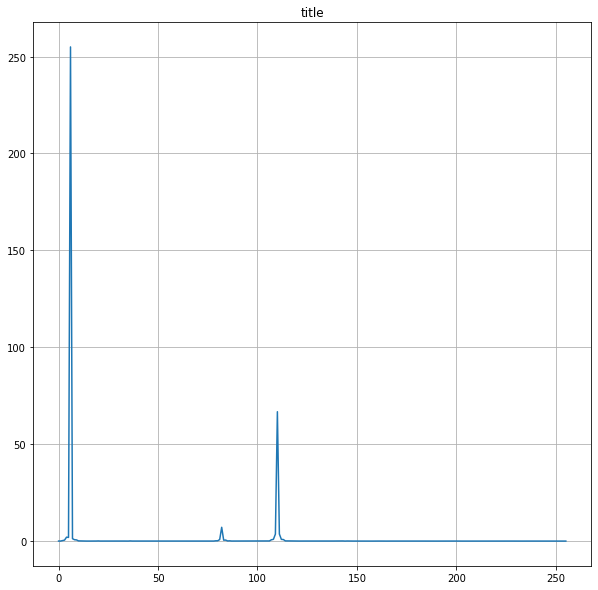

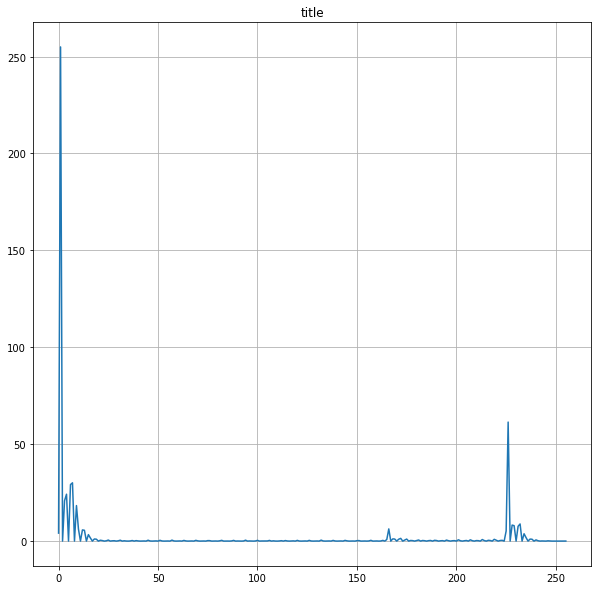

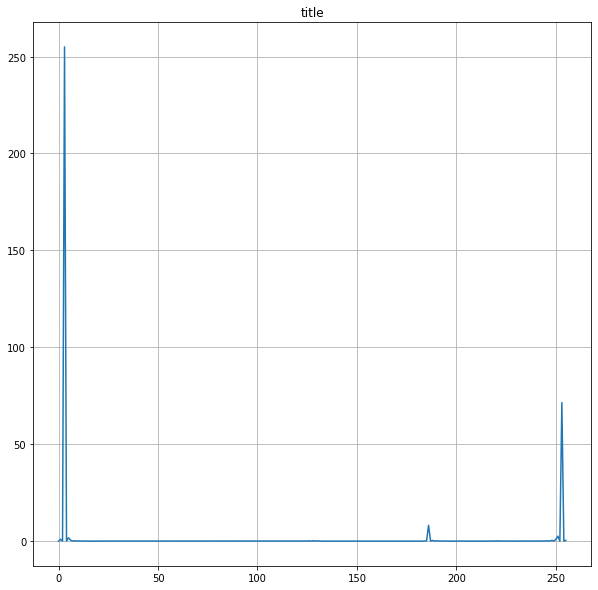

In [198]:
img_p = build_histogram(img)
img_s_n_p = build_histogram(gray_image(img_s_n))
img_cor_p = build_histogram(gray_image(img_cor))
img_cor_m_p = build_histogram(gray_image(img_cor_m))

show_plot(img_p)
show_plot(img_s_n_p)
show_plot(img_cor_p)
show_plot(img_cor_m_p)

In [188]:
ar = np.zeros((3,3))
ar[1,1] = 1
print(ar)
ar[1,1] = np.median(ar)

print(ar)

[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
